<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/rev3/S10/EVA4_S10_Solution_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement EVA 4, Session10 : CIFAR 10

**Target**: 


*   Make sure  to Add CutOut to your code. It should come from your transformations (albumentations)
*   Use this repo: https://github.com/davidtvs/pytorch-lr-finder (Links to an external site.) 
  *  Move LR Finder code to your modules
  *  Implement LR Finder (for SGD, not for ADAM)
  *  Implement ReduceLROnPlatea: https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.ReduceLROnPlateau (Links to an external site.)
*   Find best LR to train your model
*   Use SDG with Momentum
*   Train for 50 Epochs. 
*   Show Training and Test Accuracy curves
*   Target Accuracy is 88%
*   Run GradCAM on the any 25 misclassified images. Make sure you mention what is the prediction and what was the ground truth label.
*   Submit answers to S10-Assignment-Solution. 

**Results**

*  Total Parameters = 
*  After 10 Epochs, Final Train Accuracy = 
*  After 10 Epochs, Final Test Accuracy =

**Analysis**

*  Target accuracy > 88% using Reset18 architecture. Model performance is good as train and test accuracy is small.

## 1. Loading Module and Models 

In [1]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!rm -rf EVA4
!git clone -b rev3 https://github.com/sujitojha1/EVA4 -q --quiet
print("Loaded EVA4 Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet
#pip install apex -q

# For inline matplotlib plotting
%matplotlib inline

Loaded EVA4 Modules and Models
     |████████████████████████████████| 634kB 10.4MB/s 



## 2. Loading train and test data with transforms and loader functions

In [2]:
from EVA4.Modules import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

  pip install torch-lr-finder -v --global-option="amp"


CUDA availability ? True


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


## 3. Exploratory Data Analysis

### 3.1 Summary Statistics

In [3]:
cifar10.data_summary_stats()
#print(vars(train))

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### 3.2 Plotting sample images

# The Model

In [4]:
from EVA4.Models import *

# Loading ResNet18 Model
net = ResNet18()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


# Model Summary

In [5]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Define a Loss function and optimizer

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


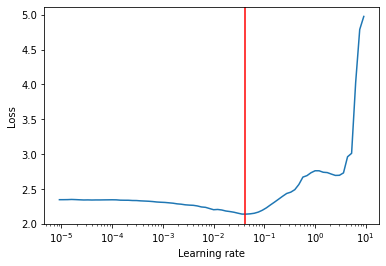

In [6]:
from EVA4.Modules import LRFinder
import torch.optim as optim

model = net
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-6, weight_decay=1e-2,momentum=0.9)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot(show_lr=0.042) # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial stat

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.042, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.5, patience=5, verbose=True)

# Training and Testing

In [8]:
# Load train and test model
from EVA4.Modules import *

train = train()
test = test()

for epoch in range(50):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    test.execute(net, device, testloader, criterion)
    scheduler.step(train.train_losses[-1])

print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 0


Loss=1.2813833951950073 Batch_id=390 Accuracy=39.26: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0120, Accuracy: 4645/10000 (46.45%)


Epoch: 1


Loss=1.0727990865707397 Batch_id=390 Accuracy=54.09: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 6397/10000 (63.97%)


Epoch: 2


Loss=0.940348744392395 Batch_id=390 Accuracy=62.50: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 6729/10000 (67.29%)


Epoch: 3


Loss=0.9355336427688599 Batch_id=390 Accuracy=67.27: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7389/10000 (73.89%)


Epoch: 4


Loss=0.7567213177680969 Batch_id=390 Accuracy=71.12: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7410/10000 (74.10%)


Epoch: 5


Loss=0.5837334990501404 Batch_id=390 Accuracy=73.80: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7955/10000 (79.55%)


Epoch: 6


Loss=0.7334895133972168 Batch_id=390 Accuracy=76.26: 100%|██████████| 391/391 [00:56<00:00,  6.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8039/10000 (80.39%)


Epoch: 7


Loss=0.5011900067329407 Batch_id=390 Accuracy=77.70: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8205/10000 (82.05%)


Epoch: 8


Loss=0.6805892586708069 Batch_id=390 Accuracy=79.16: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8405/10000 (84.05%)


Epoch: 9


Loss=0.6236758232116699 Batch_id=390 Accuracy=80.39: 100%|██████████| 391/391 [00:56<00:00,  6.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8467/10000 (84.67%)


Epoch: 10


Loss=0.6357828974723816 Batch_id=390 Accuracy=81.48: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8442/10000 (84.42%)


Epoch: 11


Loss=0.44234171509742737 Batch_id=390 Accuracy=82.47: 100%|██████████| 391/391 [00:57<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8508/10000 (85.08%)


Epoch: 12


Loss=0.6122714281082153 Batch_id=390 Accuracy=83.03: 100%|██████████| 391/391 [00:56<00:00,  6.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8651/10000 (86.51%)


Epoch: 13


Loss=0.30866843461990356 Batch_id=390 Accuracy=83.86: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8411/10000 (84.11%)


Epoch: 14


Loss=0.5045803785324097 Batch_id=390 Accuracy=84.57: 100%|██████████| 391/391 [00:56<00:00,  6.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8594/10000 (85.94%)


Epoch: 15


Loss=0.2363930642604828 Batch_id=390 Accuracy=85.17: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8632/10000 (86.32%)


Epoch: 16


Loss=0.2884664535522461 Batch_id=390 Accuracy=85.71: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8759/10000 (87.59%)


Epoch: 17


Loss=0.2559542953968048 Batch_id=390 Accuracy=86.37: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8725/10000 (87.25%)


Epoch: 18


Loss=0.2640054225921631 Batch_id=390 Accuracy=86.84: 100%|██████████| 391/391 [00:56<00:00,  6.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8761/10000 (87.61%)


Epoch: 19


Loss=0.2826584279537201 Batch_id=390 Accuracy=87.29: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8916/10000 (89.16%)


Epoch: 20


Loss=0.3790847659111023 Batch_id=390 Accuracy=88.00: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8964/10000 (89.64%)


Epoch: 21


Loss=0.42100024223327637 Batch_id=390 Accuracy=88.09: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8891/10000 (88.91%)

Epoch    22: reducing learning rate of group 0 to 2.1000e-02.

Epoch: 22


Loss=0.35264092683792114 Batch_id=390 Accuracy=90.08: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9077/10000 (90.77%)


Epoch: 23


Loss=0.2612632215023041 Batch_id=390 Accuracy=90.88: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9102/10000 (91.02%)


Epoch: 24


Loss=0.10121554136276245 Batch_id=390 Accuracy=90.98: 100%|██████████| 391/391 [00:56<00:00,  6.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9099/10000 (90.99%)


Epoch: 25


Loss=0.17339135706424713 Batch_id=390 Accuracy=91.50: 100%|██████████| 391/391 [00:56<00:00,  6.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9089/10000 (90.89%)


Epoch: 26


Loss=0.22303688526153564 Batch_id=390 Accuracy=91.47: 100%|██████████| 391/391 [00:56<00:00,  6.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9064/10000 (90.64%)


Epoch: 27


Loss=0.20635351538658142 Batch_id=390 Accuracy=91.42: 100%|██████████| 391/391 [00:57<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9121/10000 (91.21%)


Epoch: 28


Loss=0.37102794647216797 Batch_id=390 Accuracy=91.92: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9106/10000 (91.06%)


Epoch: 29


Loss=0.34886351227760315 Batch_id=390 Accuracy=91.92: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9170/10000 (91.70%)


Epoch: 30


Loss=0.29621797800064087 Batch_id=390 Accuracy=92.13: 100%|██████████| 391/391 [00:56<00:00,  6.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9122/10000 (91.22%)

Epoch    31: reducing learning rate of group 0 to 1.0500e-02.

Epoch: 31


Loss=0.13411164283752441 Batch_id=390 Accuracy=93.13: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9185/10000 (91.85%)


Epoch: 32


Loss=0.32618656754493713 Batch_id=390 Accuracy=93.46: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9181/10000 (91.81%)


Epoch: 33


Loss=0.15435418486595154 Batch_id=390 Accuracy=93.55: 100%|██████████| 391/391 [00:56<00:00,  6.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9208/10000 (92.08%)


Epoch: 34


Loss=0.1891939640045166 Batch_id=390 Accuracy=93.68: 100%|██████████| 391/391 [00:56<00:00,  6.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9213/10000 (92.13%)


Epoch: 35


Loss=0.348625510931015 Batch_id=390 Accuracy=93.73: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9214/10000 (92.14%)


Epoch: 36


Loss=0.23269109427928925 Batch_id=390 Accuracy=93.92: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9214/10000 (92.14%)

Epoch    37: reducing learning rate of group 0 to 5.2500e-03.

Epoch: 37


Loss=0.07032372057437897 Batch_id=390 Accuracy=94.48: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9257/10000 (92.57%)


Epoch: 38


Loss=0.10367251932621002 Batch_id=390 Accuracy=94.35: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9290/10000 (92.90%)


Epoch: 39


Loss=0.18636487424373627 Batch_id=390 Accuracy=94.65: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9274/10000 (92.74%)


Epoch: 40


Loss=0.3151303827762604 Batch_id=390 Accuracy=94.64: 100%|██████████| 391/391 [00:56<00:00,  6.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9301/10000 (93.01%)


Epoch: 41


Loss=0.18767771124839783 Batch_id=390 Accuracy=94.62: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9275/10000 (92.75%)


Epoch: 42


Loss=0.15195007622241974 Batch_id=390 Accuracy=94.76: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9278/10000 (92.78%)


Epoch: 43


Loss=0.18945308029651642 Batch_id=390 Accuracy=94.81: 100%|██████████| 391/391 [00:56<00:00,  6.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9274/10000 (92.74%)

Epoch    44: reducing learning rate of group 0 to 2.6250e-03.

Epoch: 44


Loss=0.12730193138122559 Batch_id=390 Accuracy=94.91: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9295/10000 (92.95%)


Epoch: 45


Loss=0.11344590038061142 Batch_id=390 Accuracy=95.08: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9282/10000 (92.82%)


Epoch: 46


Loss=0.13637769222259521 Batch_id=390 Accuracy=95.24: 100%|██████████| 391/391 [00:56<00:00,  6.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 9293/10000 (92.93%)


Epoch: 47


Loss=0.07418723404407501 Batch_id=390 Accuracy=95.26: 100%|██████████| 391/391 [00:56<00:00,  6.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9286/10000 (92.86%)


Epoch: 48


Loss=0.18779073655605316 Batch_id=390 Accuracy=95.24: 100%|██████████| 391/391 [00:56<00:00,  6.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9293/10000 (92.93%)


Epoch: 49


Loss=0.13471558690071106 Batch_id=390 Accuracy=95.19: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]



Test set: Average loss: 0.0020, Accuracy: 9286/10000 (92.86%)

Epoch    50: reducing learning rate of group 0 to 1.3125e-03.
Finished Training


# Misclassified images


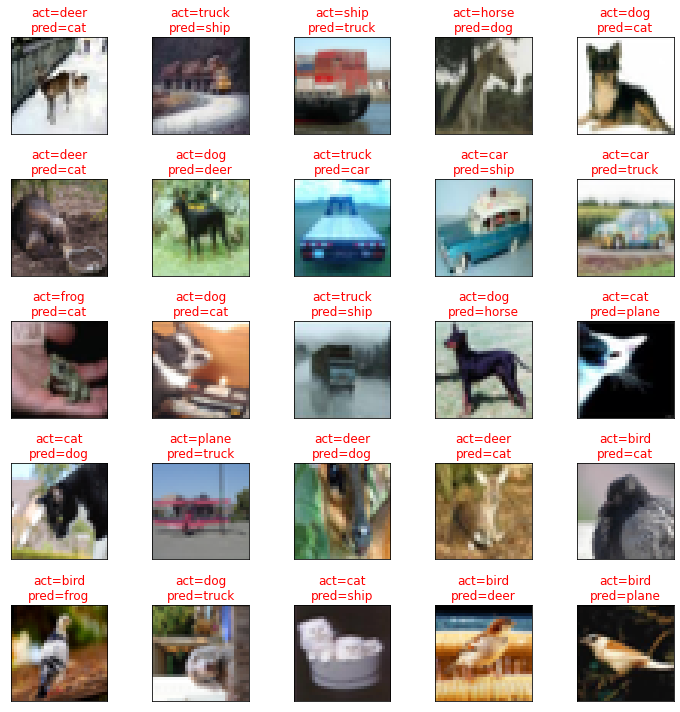

In [12]:
plot_misclassified_images(net,device,testloader,classes)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


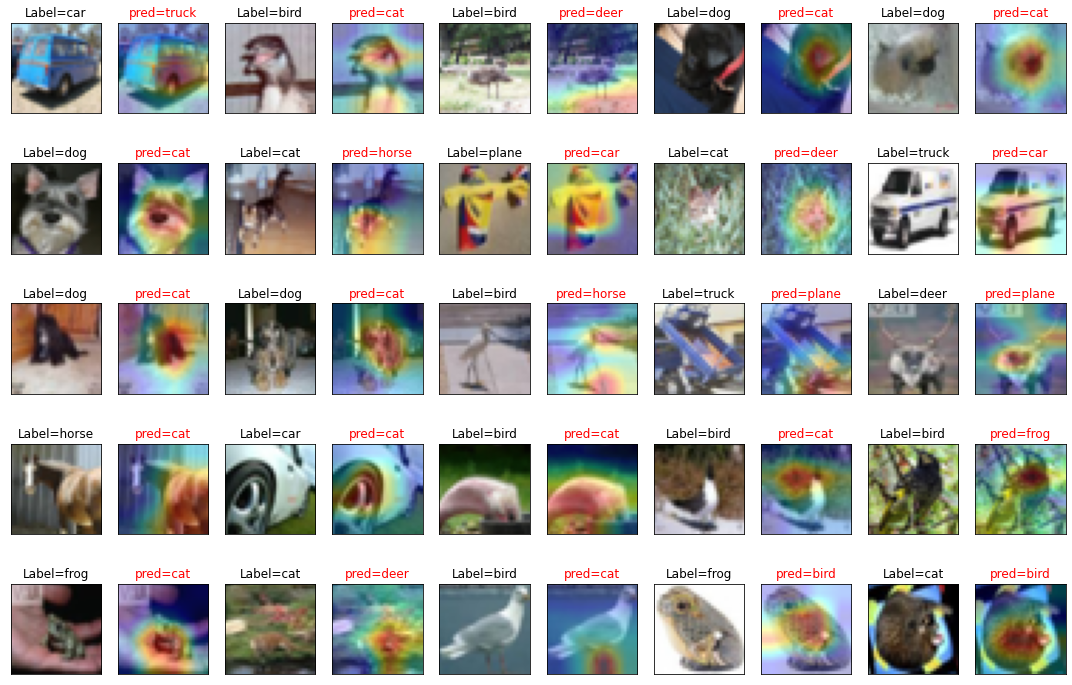

In [13]:
plot_misclassified_images_w_gradcam(net,device,testloader,classes)

# Plotting Train & Test Accuracy/Losses

# Evaluating test Accuracy over different classes 

In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 96 %
Accuracy of   car : 92 %
Accuracy of  bird : 87 %
Accuracy of   cat : 91 %
Accuracy of  deer : 93 %
Accuracy of   dog : 92 %
Accuracy of  frog : 97 %
Accuracy of horse : 94 %
Accuracy of  ship : 93 %
Accuracy of truck : 100 %


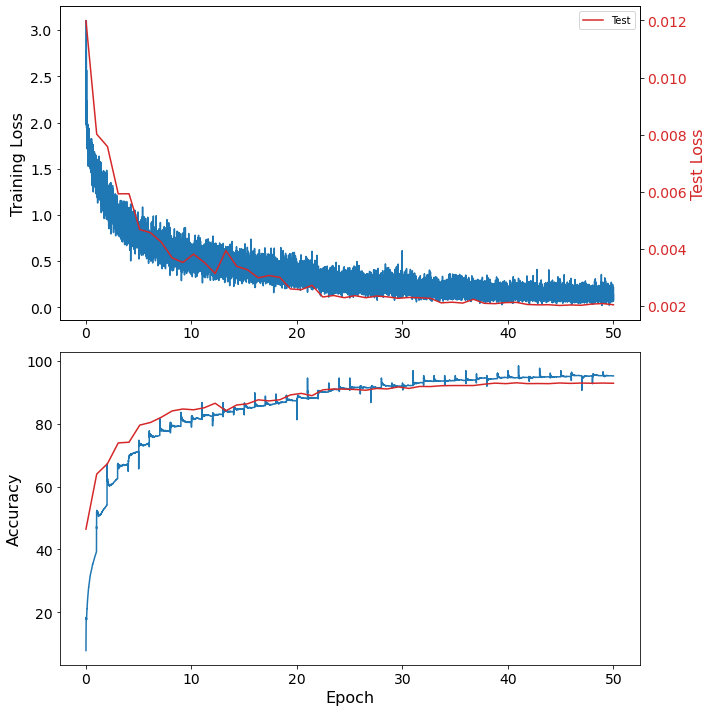

In [15]:
plot_train_test_acc_loss(train,test)